In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Kaggle Dataset

In [4]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 161M/163M [00:05<00:00, 38.7MB/s]
100% 163M/163M [00:05<00:00, 31.2MB/s]


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependencies

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2444.jpg', 'with_mask_3220.jpg', 'with_mask_1795.jpg', 'with_mask_1696.jpg', 'with_mask_3035.jpg']
['with_mask_3206.jpg', 'with_mask_25.jpg', 'with_mask_3483.jpg', 'with_mask_3626.jpg', 'with_mask_3589.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2008.jpg', 'without_mask_53.jpg', 'without_mask_2038.jpg', 'without_mask_426.jpg', 'without_mask_85.jpg']
['without_mask_3571.jpg', 'without_mask_2150.jpg', 'without_mask_323.jpg', 'without_mask_2466.jpg', 'without_mask_2100.jpg']


In [10]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

with mask --> 1

without mask --> 0



In [11]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [12]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

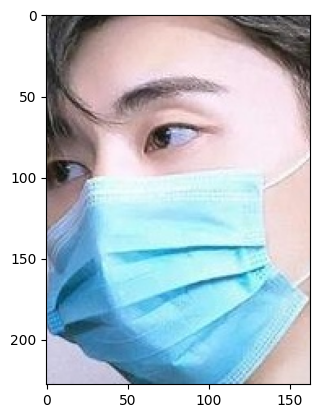

In [15]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

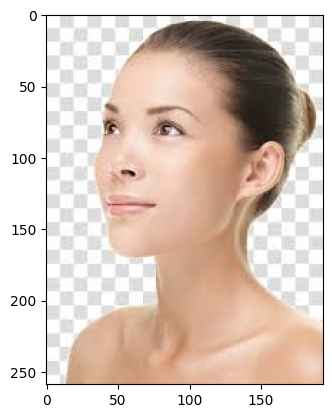

In [16]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resize the Images

2. Convert the images to numpy arrays

In [17]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

array([[[150, 122, 120],
        [149, 119, 118],
        [148, 118, 116],
        ...,
        [128,  94,  90],
        [129,  96,  91],
        [131,  98,  93]],

       [[153, 124, 122],
        [151, 123, 120],
        [148, 118, 116],
        ...,
        [135, 101,  97],
        [135, 102,  97],
        [136, 103,  99]],

       [[151, 122, 120],
        [150, 121, 119],
        [142, 113, 111],
        ...,
        [134,  99,  97],
        [133,  99,  96],
        [132,  97,  95]],

       ...,

       [[215, 208, 240],
        [219, 212, 240],
        [200, 194, 215],
        ...,
        [130,  93,  92],
        [114,  82,  83],
        [ 88,  59,  62]],

       [[212, 209, 248],
        [212, 210, 249],
        [219, 217, 248],
        ...,
        [129,  92,  91],
        [114,  81,  82],
        [ 88,  57,  61]],

       [[215, 216, 255],
        [200, 201, 247],
        [209, 211, 246],
        ...,
        [129,  92,  91],
        [114,  80,  81],
        [ 87,  56,  61]]], dtype=uint8)
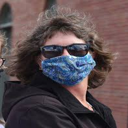

In [20]:
data[0]

In [22]:
type(data[0])

numpy.ndarray

In [23]:
data[0].shape

(128, 128, 3)

In [24]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [25]:
type(X)

numpy.ndarray

In [26]:
type(Y)

numpy.ndarray

In [27]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [28]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [31]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[253, 253, 254],
        [252, 254, 255],
        [249, 246, 241],
        ...,
        [105, 102,  77],
        [154, 156, 148],
        [ 91,  93, 119]],

       [[253, 253, 254],
        [251, 253, 255],
        [251, 248, 243],
        ...,
        [158, 147, 111],
        [158, 149, 123],
        [156, 146, 144]],

       [[253, 253, 254],
        [251, 253, 254],
        [251, 248, 243],
        ...,
        [170, 149, 114],
        [168, 147, 110],
        [185, 162, 133]],

       ...,

       [[254, 254, 253],
        [253, 255, 249],
        [241, 244, 249],
        ...,
        [193, 191, 204],
        [191, 189, 202],
        [166, 164, 177]],

       [[254, 253, 255],
        [253, 255, 253],
        [237, 239, 247],
        ...,
        [186, 184, 197],
        [197, 195, 208],
        [181, 179, 192]],

       [[254, 253, 255],
        [253, 255, 253],
        [236, 239, 245],
        ...,
        [181, 179, 192],
        [197, 195, 208],
        [193, 191, 204]]], dtype=uint8)
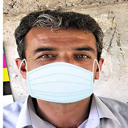

In [32]:
X_train[0]

In [33]:
X_train_scaled[0]

array([[[0.99215686, 0.99215686, 0.99607843],
        [0.98823529, 0.99607843, 1.        ],
        [0.97647059, 0.96470588, 0.94509804],
        ...,
        [0.41176471, 0.4       , 0.30196078],
        [0.60392157, 0.61176471, 0.58039216],
        [0.35686275, 0.36470588, 0.46666667]],

       [[0.99215686, 0.99215686, 0.99607843],
        [0.98431373, 0.99215686, 1.        ],
        [0.98431373, 0.97254902, 0.95294118],
        ...,
        [0.61960784, 0.57647059, 0.43529412],
        [0.61960784, 0.58431373, 0.48235294],
        [0.61176471, 0.57254902, 0.56470588]],

       [[0.99215686, 0.99215686, 0.99607843],
        [0.98431373, 0.99215686, 0.99607843],
        [0.98431373, 0.97254902, 0.95294118],
        ...,
        [0.66666667, 0.58431373, 0.44705882],
        [0.65882353, 0.57647059, 0.43137255],
        [0.7254902 , 0.63529412, 0.52156863]],

       ...,

       [[0.99607843, 0.99607843, 0.99215686],
        [0.99215686, 1.        , 0.97647059],
        [0.94509804, 0

Building a Convolutional Neural Networks (CNN)

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [36]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [37]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 11s 26ms/step - loss: 0.4504 - acc: 0.8087 - val_loss: 0.2890 - val_acc: 0.8793
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2898 - acc: 0.8900 - val_loss: 0.2268 - val_acc: 0.9025
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2228 - acc: 0.9097 - val_loss: 0.2181 - val_acc: 0.9157
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1841 - acc: 0.9273 - val_loss: 0.2007 - val_acc: 0.9107
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1538 - acc: 0.9428 - val_loss: 0.2000 - val_acc: 0.9174


In [38]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 18ms/step - loss: 0.2070 - acc: 0.9146
Test Accuracy = 0.9146260619163513


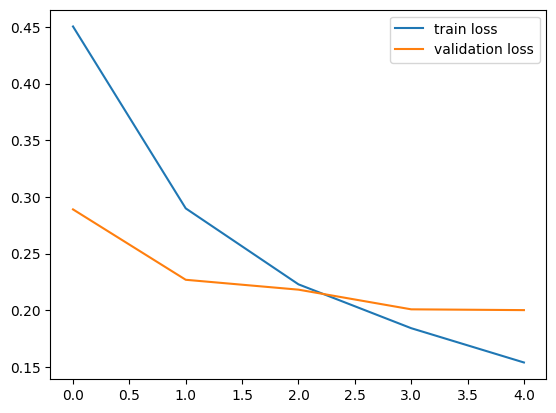

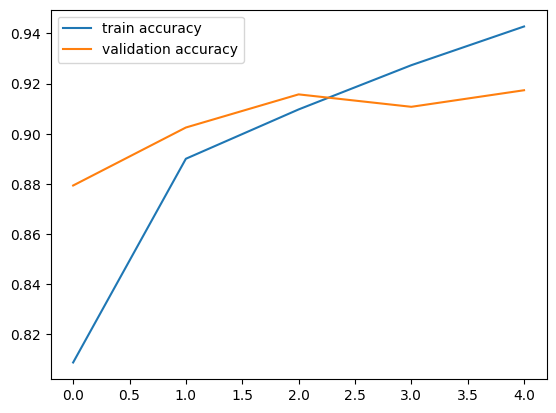

In [39]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/106467352-1585602933667virus-medical-flu-mask-health-protection-woman-young-outdoor-sick-pollution-protective-danger-face_t20_o07dbe.jpg


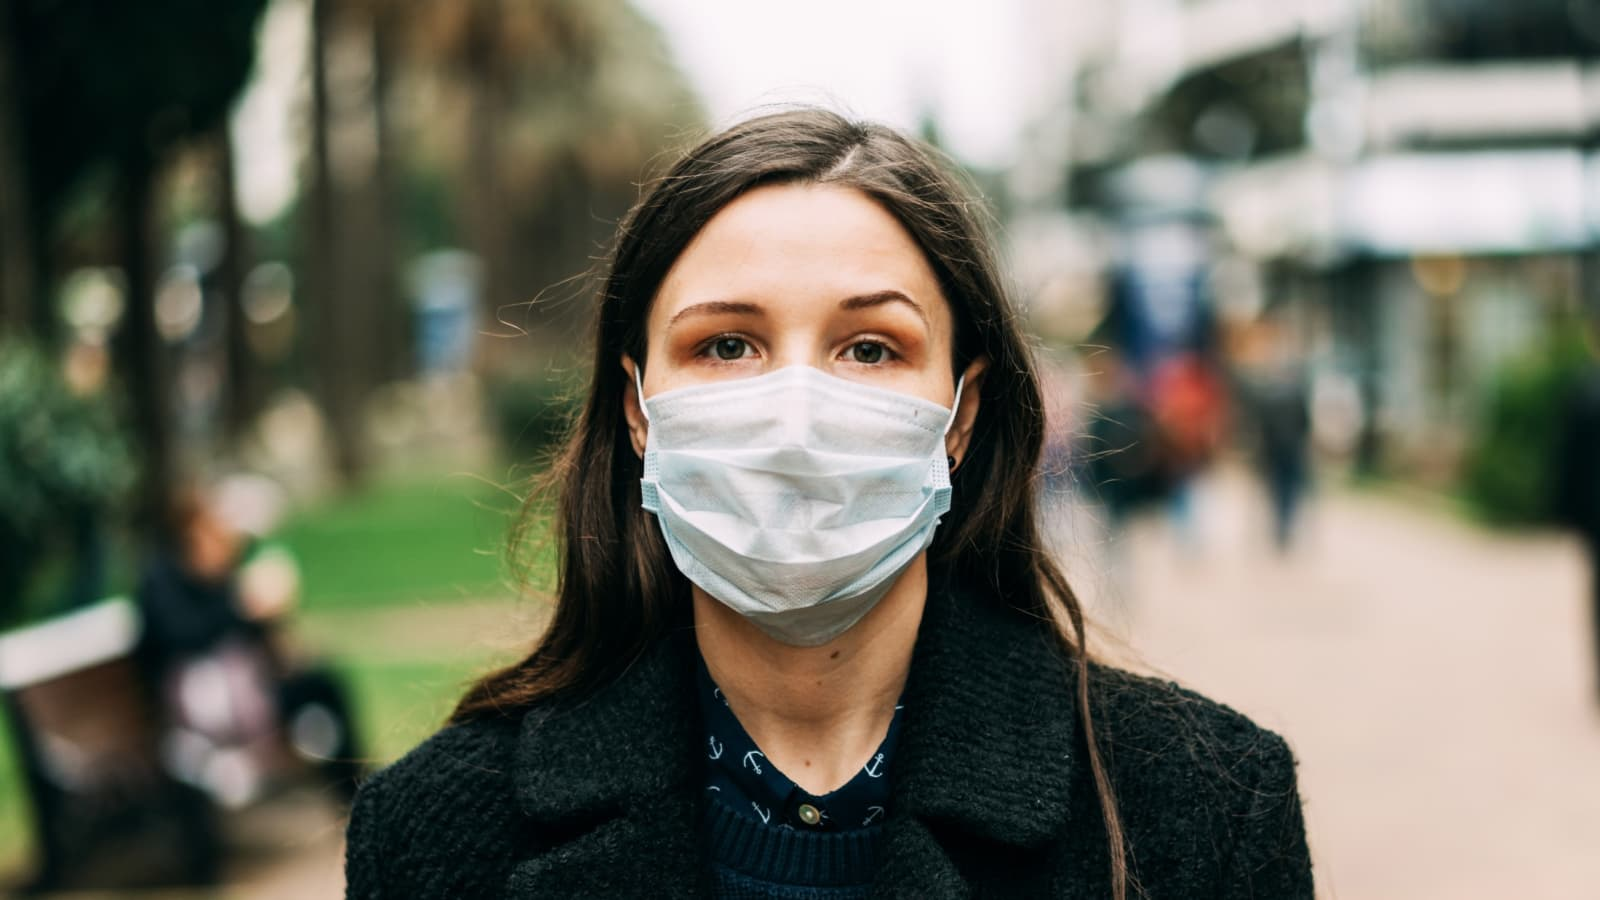

1/1 [==============================] - 0s 30ms/step
[[0.40555283 0.60575056]]
1
The person in the image is wearing a mask


In [52]:
#with mask
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/depositphotos_278981062-stock-photo-beautiful-young-woman-clean-fresh.jpg


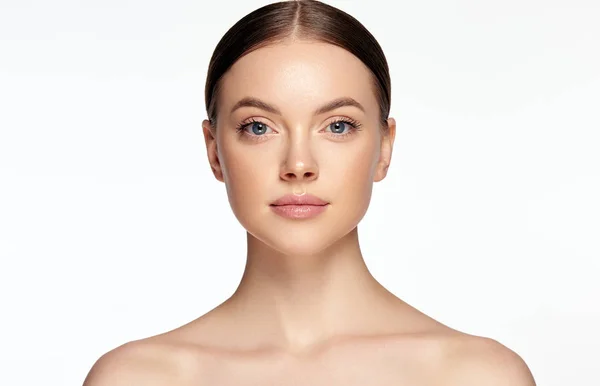

1/1 [==============================] - 0s 18ms/step
[[0.56793576 0.41341746]]
0
The person in the image is not wearing a mask


In [48]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [51]:
model.save('mask_detector_model.h5')
from google.colab import files
files.download('mask_detector_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>